In [60]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Data preprocessing
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# One-hot encode target labels (optional, but recommended for multi-class classification)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Define the CNN model
model = Sequential()

# First convolutional block
model.add(Conv2D(16, (3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='valid'))

# First max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='valid'))

# Second max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer for classification
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                   

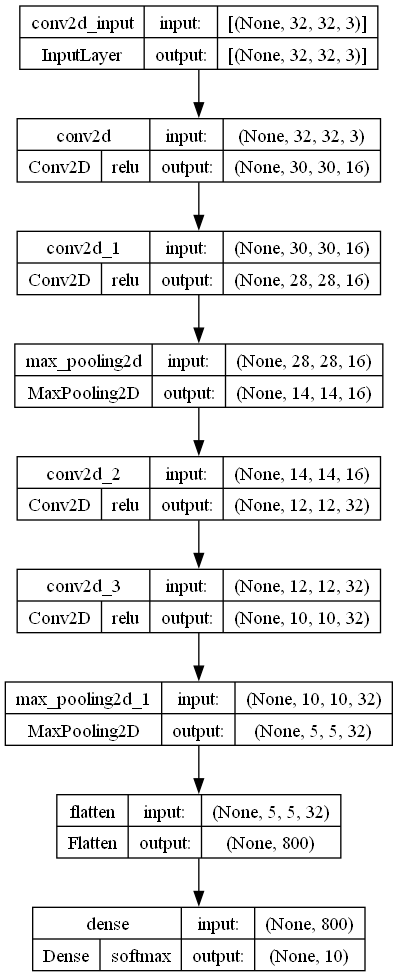

In [9]:
model.summary()
plot_model(model, show_shapes= True, show_layer_activations=True)

In [6]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


782/782 [==============================] - 11s 12ms/step - loss: 1.6383 - accuracy: 0.4049 - val_loss: 1.4838 - val_accuracy: 0.4797
Epoch 2/5
782/782 [==============================] - 10s 13ms/step - loss: 1.2940 - accuracy: 0.5409 - val_loss: 1.1905 - val_accuracy: 0.5773
Epoch 3/5
782/782 [==============================] - 10s 13ms/step - loss: 1.1672 - accuracy: 0.5914 - val_loss: 1.1228 - val_accuracy: 0.6057
Epoch 4/5
782/782 [==============================] - 11s 14ms/step - loss: 1.0881 - accuracy: 0.6196 - val_loss: 1.0610 - val_accuracy: 0.6247
Epoch 5/5
782/782 [==============================] - 16s 20ms/step - loss: 1.0262 - accuracy: 0.6414 - val_loss: 1.0395 - val_accuracy: 0.6361


In [10]:
# Print training and validation accuracy after each epoch
print("Training and Validation Accuracy History:")
for i in range(5):
    print(f"Epoch {i+1}: Train Accuracy = {history.history['accuracy'][i]:.4f}, Validation Accuracy = {history.history['val_accuracy'][i]:.4f}")

Training and Validation Accuracy History:
Epoch 1: Train Accuracy = 0.4049, Validation Accuracy = 0.4797
Epoch 2: Train Accuracy = 0.5409, Validation Accuracy = 0.5773
Epoch 3: Train Accuracy = 0.5914, Validation Accuracy = 0.6057
Epoch 4: Train Accuracy = 0.6196, Validation Accuracy = 0.6247
Epoch 5: Train Accuracy = 0.6414, Validation Accuracy = 0.6361


In [46]:
# Define the CNN model
model2 = Sequential()

# First convolutional block
model2.add(Conv2D(16, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))  # Dropout to prevent overfitting

# Second convolutional block
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

# Third convolutional block
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

# 4th convolutional block
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))


# Flatten layer
model2.add(Flatten())

#Fully connected layers
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))  # Higher dropout rate for fully connected layers

# Dense layer for classification
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 32, 32, 16)        1216      
                                                                 
 batch_normalization_53 (Ba  (None, 32, 32, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_69 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_54 (Ba  (None, 16, 16, 32)      

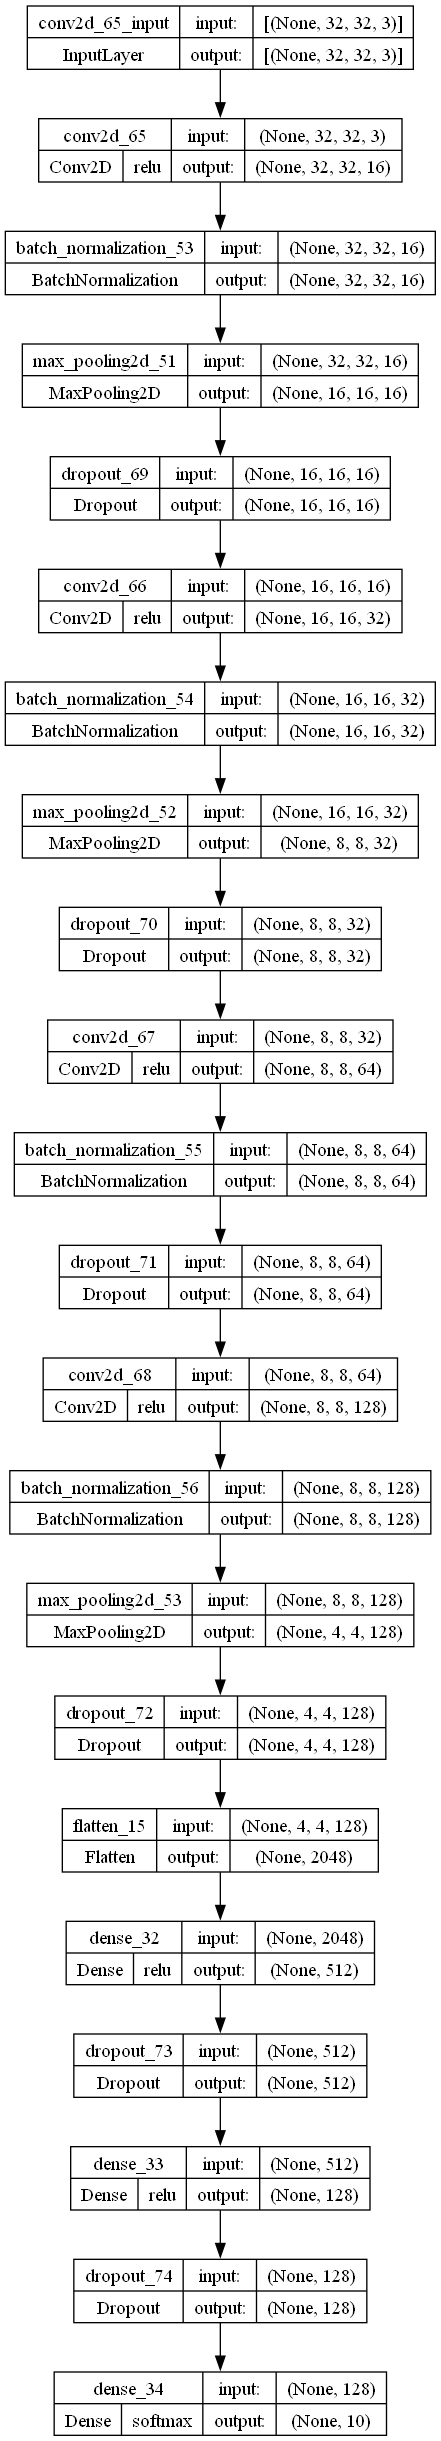

In [47]:
model2.summary()
plot_model(model2, show_shapes= True, show_layer_activations=True)

In [48]:
# Train the model
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 38s 45ms/step - loss: 1.5773 - accuracy: 0.4358 - val_loss: 1.4034 - val_accuracy: 0.5252
Epoch 2/5
782/782 [==============================] - 36s 46ms/step - loss: 1.1833 - accuracy: 0.5814 - val_loss: 1.4019 - val_accuracy: 0.5277
Epoch 3/5
782/782 [==============================] - 37s 48ms/step - loss: 0.9986 - accuracy: 0.6495 - val_loss: 0.8932 - val_accuracy: 0.6899
Epoch 4/5
782/782 [==============================] - 41s 52ms/step - loss: 0.8787 - accuracy: 0.6941 - val_loss: 0.9976 - val_accuracy: 0.6629
Epoch 5/5
782/782 [==============================] - 37s 47ms/step - loss: 0.7987 - accuracy: 0.7233 - val_loss: 0.9052 - val_accuracy: 0.6970


In [49]:
# Print training and validation accuracy after each epoch
print("Training and Validation Accuracy History:")
for i in range(5):
    print(f"Epoch {i+1}: Train Accuracy = {history2.history['accuracy'][i]:.4f}, Validation Accuracy = {history2.history['val_accuracy'][i]:.4f}")

Training and Validation Accuracy History:
Epoch 1: Train Accuracy = 0.4358, Validation Accuracy = 0.5252
Epoch 2: Train Accuracy = 0.5814, Validation Accuracy = 0.5277
Epoch 3: Train Accuracy = 0.6495, Validation Accuracy = 0.6899
Epoch 4: Train Accuracy = 0.6941, Validation Accuracy = 0.6629
Epoch 5: Train Accuracy = 0.7233, Validation Accuracy = 0.6970


In [54]:
# Define the CNN model
model2 = Sequential()

# First convolutional block
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.15))  # Dropout to prevent overfitting

# Second convolutional block
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
#model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.15))

# Third convolutional block
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.15))

# Third convolutional block
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.15))


# Flatten layer
model2.add(Flatten())

#Fully connected layers
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.35))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))  # Higher dropout rate for fully connected layers

# Dense layer for classification
model2.add(Dense(10, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_65 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_89 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_78 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 batch_normalization_66 (Ba  (None, 16, 16, 128)     

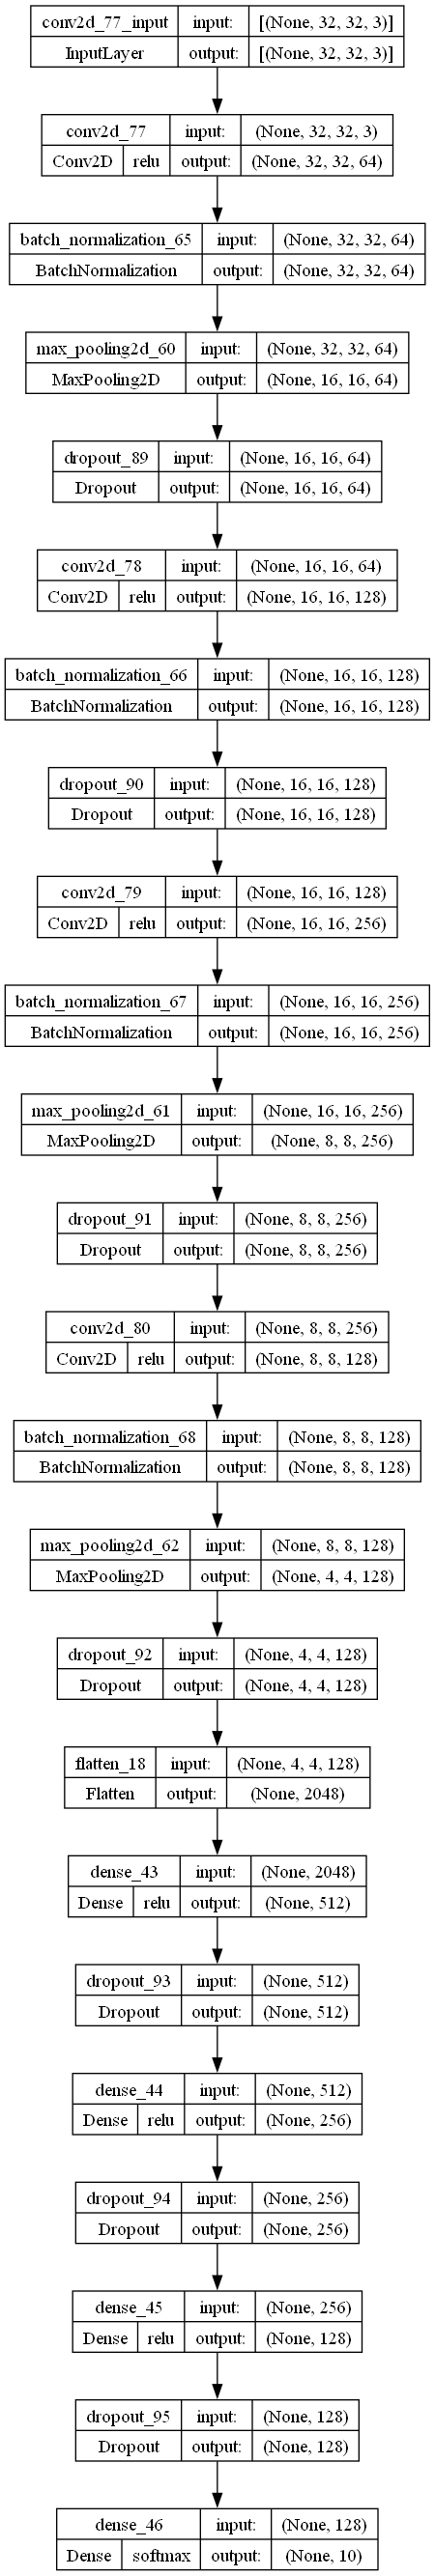

In [55]:
model2.summary()
plot_model(model2, show_shapes= True, show_layer_activations=True)

In [56]:
# Train the model
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 259s 328ms/step - loss: 1.5911 - accuracy: 0.4261 - val_loss: 1.3560 - val_accuracy: 0.5232
Epoch 2/5
782/782 [==============================] - 254s 324ms/step - loss: 1.1326 - accuracy: 0.6022 - val_loss: 1.5777 - val_accuracy: 0.5055
Epoch 3/5
782/782 [==============================] - 231s 295ms/step - loss: 0.9346 - accuracy: 0.6809 - val_loss: 0.8107 - val_accuracy: 0.7189
Epoch 4/5
782/782 [==============================] - 224s 287ms/step - loss: 0.8086 - accuracy: 0.7271 - val_loss: 0.9194 - val_accuracy: 0.6810
Epoch 5/5
782/782 [==============================] - 243s 311ms/step - loss: 0.7175 - accuracy: 0.7549 - val_loss: 0.9196 - val_accuracy: 0.6843


In [57]:
# Print training and validation accuracy after each epoch
print("Training and Validation Accuracy History:")
for i in range(5):
    print(f"Epoch {i+1}: Train Accuracy = {history2.history['accuracy'][i]:.4f}, Validation Accuracy = {history2.history['val_accuracy'][i]:.4f}")

Training and Validation Accuracy History:
Epoch 1: Train Accuracy = 0.4261, Validation Accuracy = 0.5232
Epoch 2: Train Accuracy = 0.6022, Validation Accuracy = 0.5055
Epoch 3: Train Accuracy = 0.6809, Validation Accuracy = 0.7189
Epoch 4: Train Accuracy = 0.7271, Validation Accuracy = 0.6810
Epoch 5: Train Accuracy = 0.7549, Validation Accuracy = 0.6843
